# two way hierarchycal clustering example

https://stackoverflow.com/questions/2982929/plotting-results-of-hierarchical-clustering-on-top-of-a-matrix-of-data


In [2]:
# 사용할 패키지를 import합니다
import sys
print('python', sys.version)

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)

import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic") # window
plt.rc("axes", unicode_minus=False) # x,y축 (-)부호 표시

import seaborn as sns
print('seaborn', sns.__version__)

import pickle

import scipy.stats as spy
import statsmodels.stats.multitest
# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

python 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
numpy 1.24.3
pandas 2.0.3
matplotlib 3.8.3
seaborn 0.13.2


# Load pickle file

C:\Users\mit005\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\mit005\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


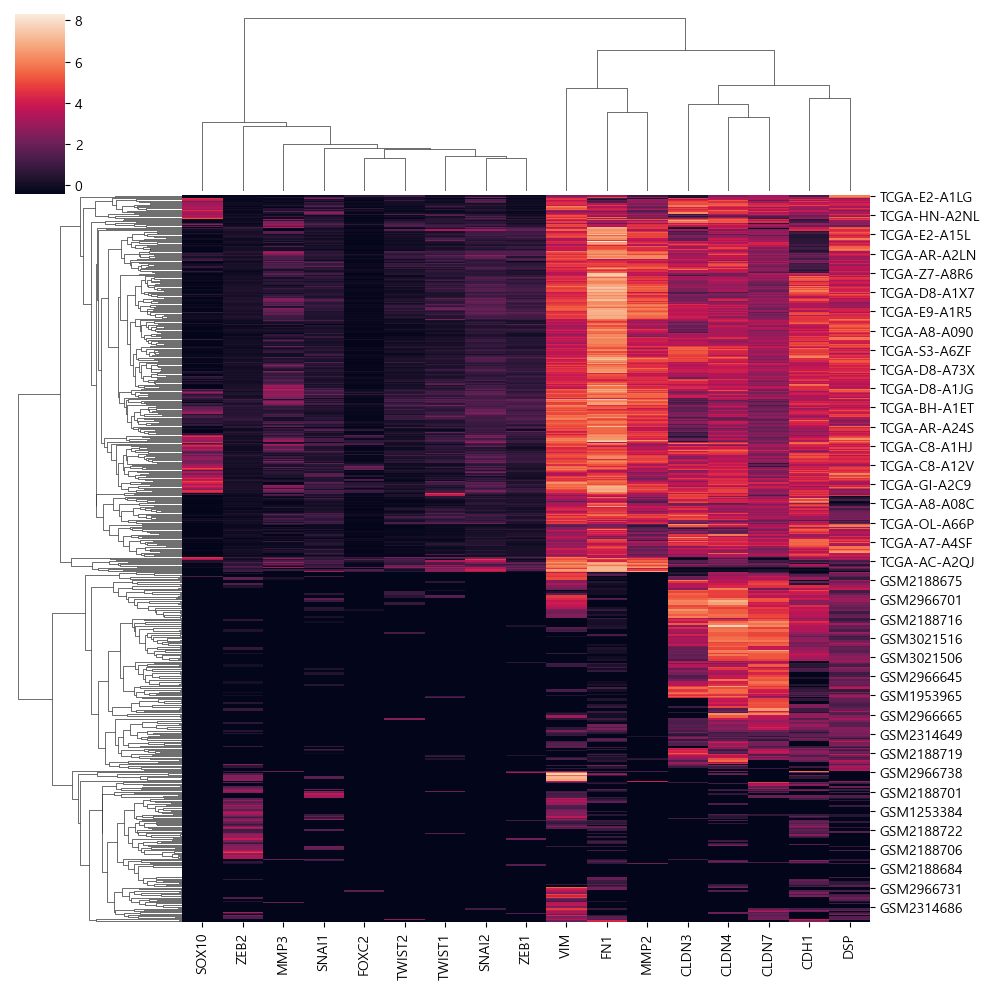

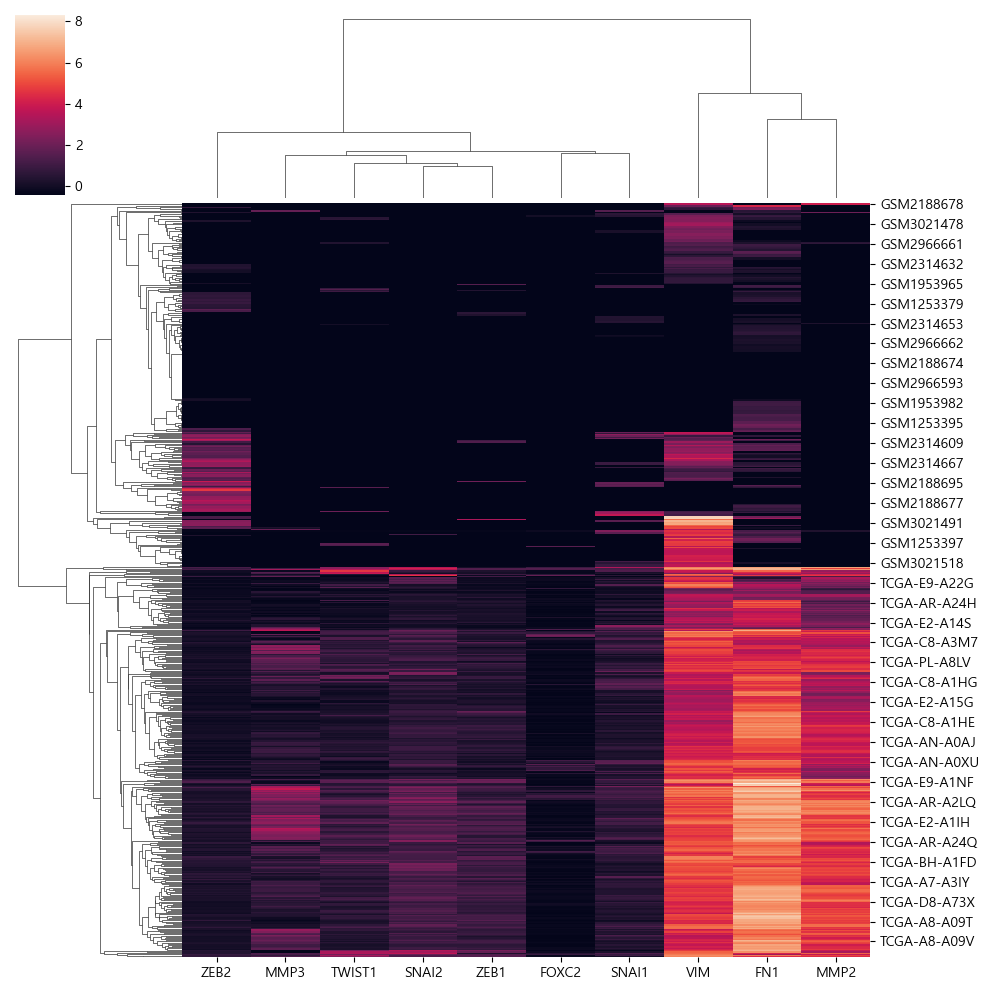

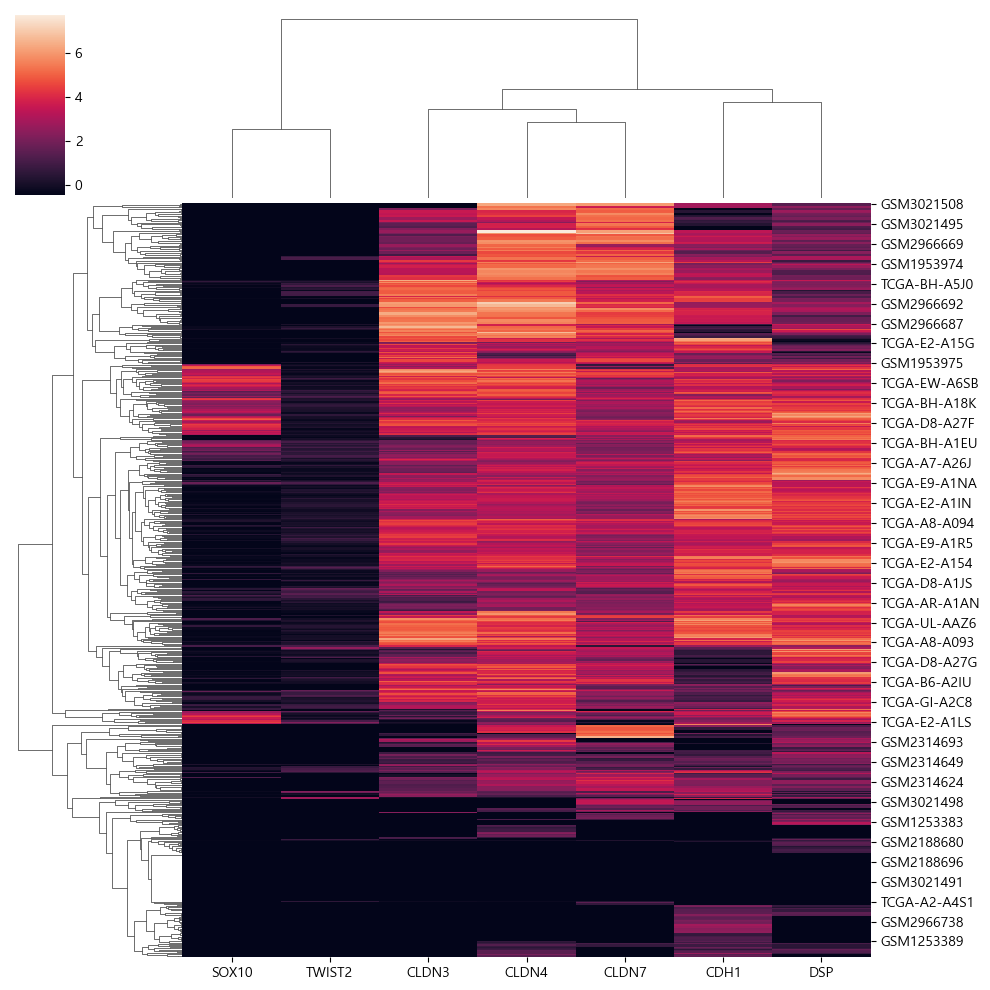

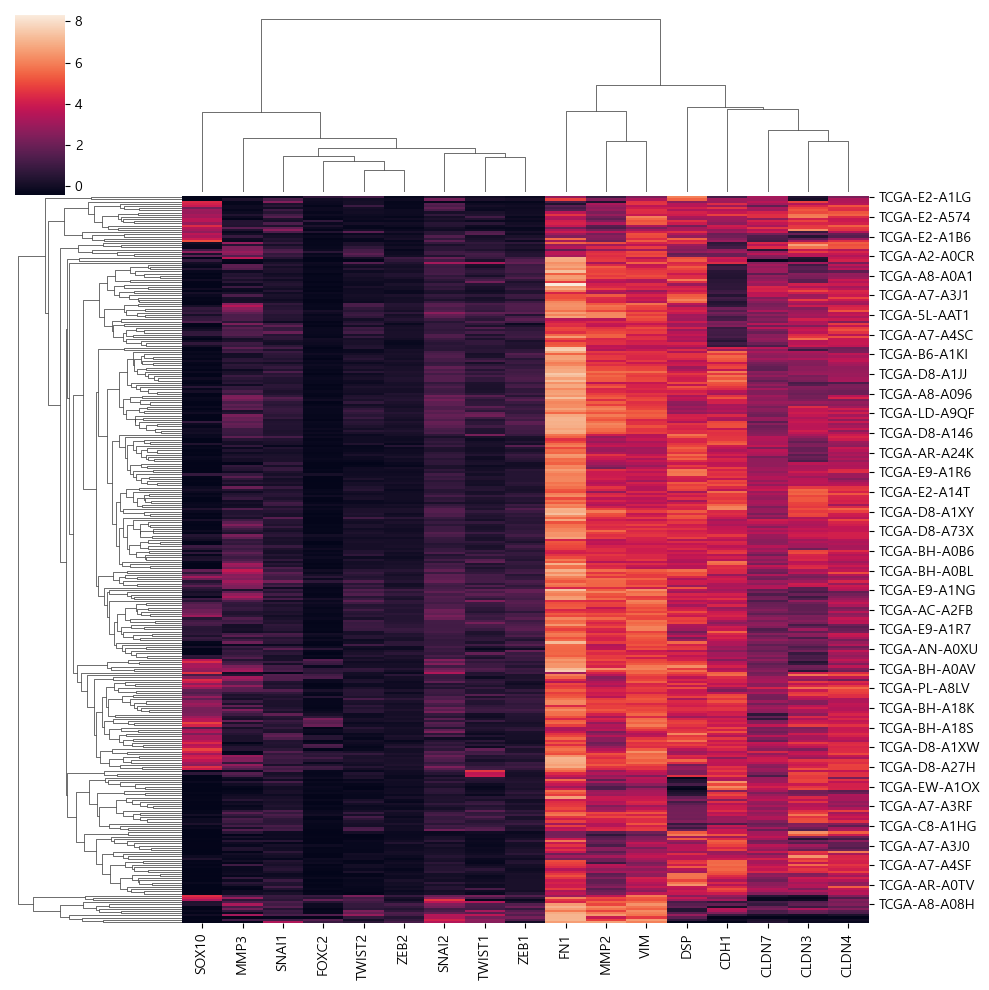

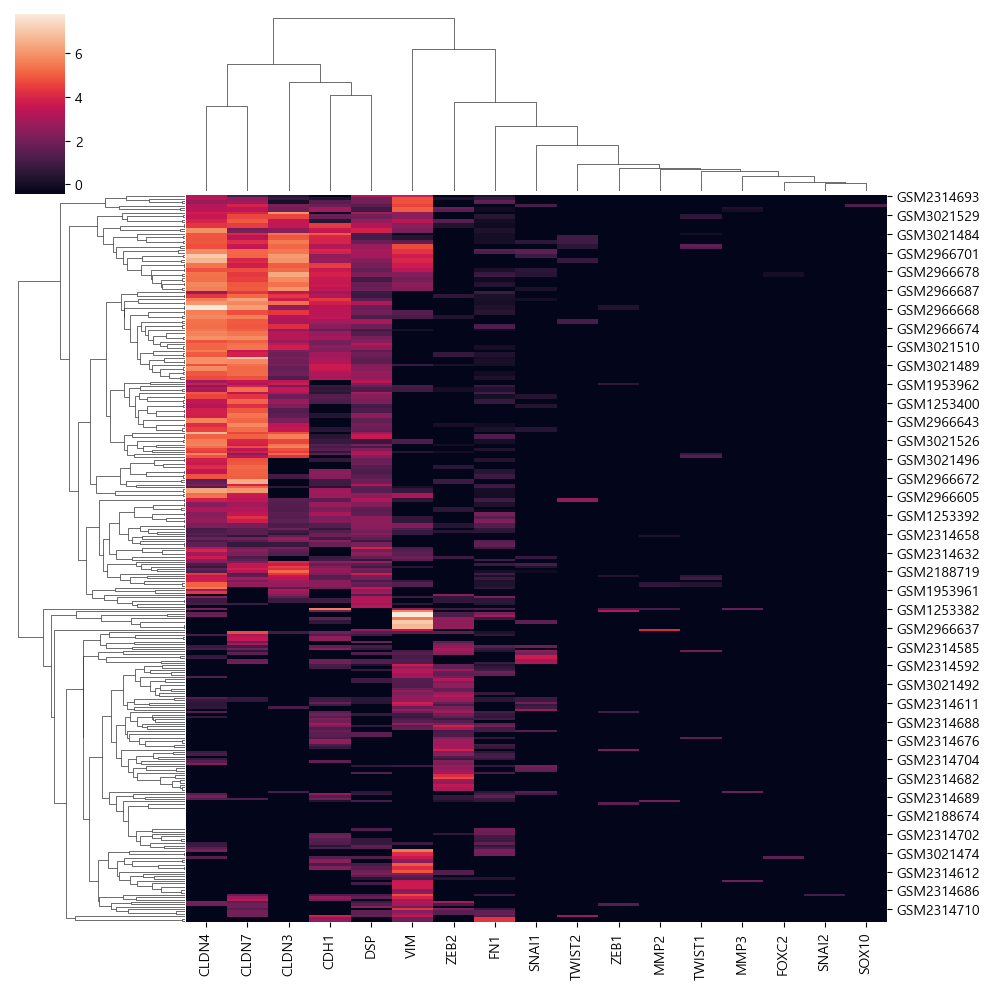

In [11]:
with open("result/preprop_df_z.pickle","rb") as fw:
    preprop_df=pickle.load(fw)
    
# preprop_df


EXP_TIMES = 1.5 # how many times of the mean prm expression
NUM_MARKS = 3 # how many markers
emt_mkrs=['CDH1','CLDN3','CLDN4','CLDN7','DSP','FN1','FOXC2','MMP2','MMP3','SNAI1','SNAI2','SOX10','TWIST1','TWIST2','VIM','ZEB1','ZEB2'] # 17개의 유전자 서명
emt_act_mkrs = ['FN1', 'FOXC2', 'MMP2', 'MMP3', 'SNAI1', 'SNAI2', 'TWIST1', 'VIM', 'ZEB1', 'ZEB2'] # 중간연계 상태
emt_inact_mkrs = ['CDH1', 'CLDN3', 'CLDN4', 'CLDN7', 'DSP', 'SOX10', 'TWIST2'] # 상피성 상태
# len(emt_mkrs) # 17개

prm_emt_exp = preprop_df.loc[preprop_df['class']==0, emt_mkrs] # 원발암이면서 EMT
# prm_emt_exp
ctc_emt_exp=preprop_df.loc[preprop_df['class']==1, emt_mkrs] # 순환암이면서 EMT
# ctc_emt_exp

emt_df = preprop_df.loc[:, emt_mkrs] # EMT만
sns.clustermap(emt_df)

emt_act_df = preprop_df.loc[:, emt_act_mkrs] # 중간연계만
sns.clustermap(emt_act_df)

emt_inact_df = preprop_df.loc[:, emt_inact_mkrs] # 상피성만
sns.clustermap(emt_inact_df)

sns.clustermap(prm_emt_exp) # 원발암, EMT
sns.clustermap(ctc_emt_exp) # 순환암, EMT

# Hierarchycal clustering and two groups of samples



In [12]:
from matplotlib.patches import Rectangle

         SAMPLE  CLUSTER
0    GSM2314585        2
1    GSM2314587        2
2    GSM2314589        2
3    GSM2314591        2
4    GSM2314592        2
..          ...      ...
305  GSM1659039        2
306  GSM1659040        2
307  GSM1659041        2
308  GSM1659042        2
309  GSM1659043        2

[310 rows x 2 columns]


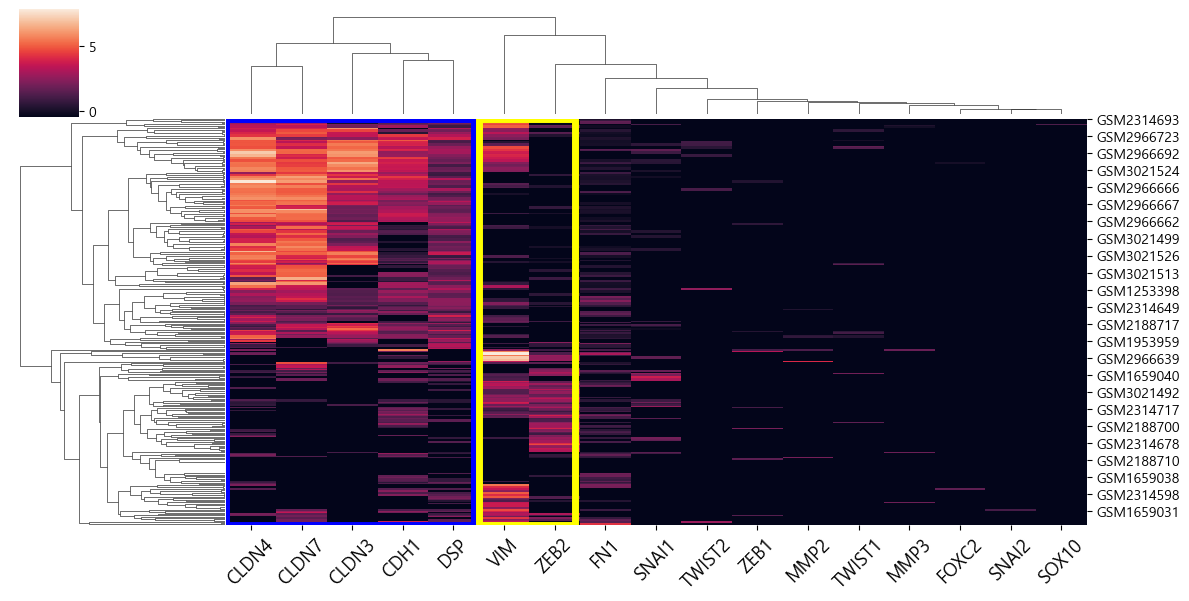

In [23]:
import pandas as pd
import seaborn as sns
import scipy.cluster.hierarchy as sch

#df = pd.read_csv('expression_data.txt', sep='\t', index_col=0)

df = ctc_emt_exp # 순환암, EMT
g = sns.clustermap(ctc_emt_exp, figsize=(12,6)) # 클러스터링 결과

# retrieve clusters using fcluster 
#d = sch.distance.pdist(df)
#L = sch.linkage(d, method='complete')
L = g.dendrogram_row.linkage # 계층적 군집 분석(Hierarchical clustering analysis)에서 생성된 덴드로그램(Dendrogram)에서 각 행(데이터 포인트 또는 샘플) 사이의 연결(linkage) 정보
# 0.2 can be modified to retrieve more stringent or relaxed clusters
clusters = sch.fcluster(L, 7, 'distance')
# clusters # 1, 2

g.ax_heatmap.add_patch(Rectangle((0, 0), 4.9, 310, facecolor='none', edgecolor='blue',lw=5)) # 상피성
g.ax_heatmap.add_patch(Rectangle((5, 0), 1.9, 310, facecolor='none', edgecolor='yellow',lw=5)) # 중간연계
g.ax_heatmap.tick_params(axis='x', labelsize=13, labelrotation=45)

plt.gcf().savefig('./Fig2.png', dpi=300)
# clusters indicices correspond to incides of original df
cluster_labels = []
for i,cluster in enumerate(clusters):
    #print(df.index[i], cluster)
    cluster_labels.append([df.index[i], cluster])

df = pd.DataFrame(cluster_labels, columns = ['SAMPLE', 'CLUSTER'])
print(df)
df.to_csv('result/ctc_emt_clustering_labels.txt', index=False, sep = "\t")

         SAMPLE  CLUSTER
0    GSM2314585        2
1    GSM2314587        2
2    GSM2314589        2
3    GSM2314591        2
4    GSM2314592        2
..          ...      ...
305  GSM1659039        2
306  GSM1659040        2
307  GSM1659041        2
308  GSM1659042        2
309  GSM1659043        2

[310 rows x 2 columns]


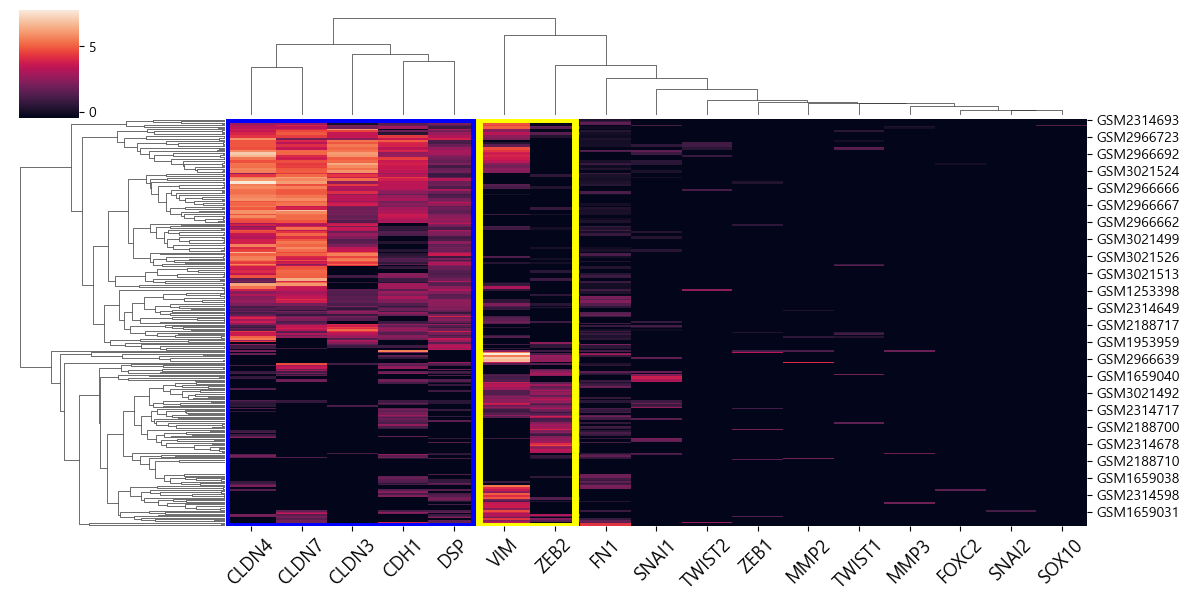